# **Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [38]:
import numpy.linalg as lg
import numpy as np
from collections import Counter
import scipy.spatial.distance as dist


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin, SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        indexes = dist.cdist(self.X_train, X).T.argsort()[:, :self.n_neighbors]
        classes = self.y_train[indexes].astype(int)
        max_val_class = int(self.y_train.max())
        classes_count = np.apply_along_axis(
            lambda x: np.bincount(x, minlength=max_val_class + 1),
            axis=1, arr=classes)
        return classes_count.argmax(axis=1)

    def predict_proba(self, X):
        indexes = dist.cdist(self.X_train, X).T.argsort()[:, :self.n_neighbors]
        classes = self.y_train[indexes].astype(int)
        indexes = None
        max_val_class = int(self.y_train.max())
        classes_count = np.apply_along_axis(
            lambda x: np.bincount(x, minlength=max_val_class + 1),
            axis=1, arr=classes)
        classes = None
        return classes_count/(classes_count.sum(axis=1)[:, None])

    def score(self, X, y):
        y_predict = self.predict(X)
        return len((np.where(y_predict - y == 0))[0])/len(y)

**IRIS**

In [39]:
iris = datasets.load_iris()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [41]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [42]:
%time clf.fit(X_train, y_train)

Wall time: 3 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [43]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [44]:
%time clf.predict(X_test)

Wall time: 4 ms


array([0, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1])

In [45]:
%time my_clf.predict(X_test)

Wall time: 3 ms


array([0, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1], dtype=int64)

In [52]:
%time clf.predict_proba(X_test)

Wall time: 2 ms


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

In [53]:
%time my_clf.predict_proba(X_test)

Wall time: 1 ms


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

In [54]:
clf.score(X_test, y_test)

0.8666666666666667

In [55]:
my_clf.score(X_test, y_test)

0.8666666666666667

17


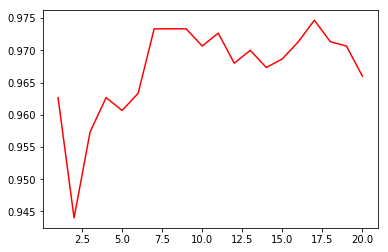

In [57]:
# Задание 3
num = 20
bunch = 100
ans = np.zeros(num)
m = np.zeros(bunch)
for j in range(1, num + 1):
    for i in range(0, bunch):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=j)
        my_clf.fit(X_train, y_train)
        m[i] = my_clf.score(X_test, y_test)
    ans[j-1] = m.mean()
print(ans.argmax()+1)
plt.plot(range(1, num + 1), ans, 'red')
plt.show()

**MNIST**

In [13]:
mnist = fetch_mldata('MNIST original')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [15]:
%time clf.fit(X_train, y_train)

Wall time: 43.4 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [17]:
%time clf.predict(X_test)

Wall time: 9min 49s


array([ 3.,  7.,  0., ...,  5.,  2.,  5.])

In [18]:
%time my_clf.predict(X_test)

Wall time: 7min 5s


array([3, 7, 0, ..., 5, 2, 5], dtype=int64)

In [23]:
%time clf.predict_proba(X_test)

Wall time: 9min 59s


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [22]:
%time my_clf.predict_proba(X_test)

Wall time: 6min 49s


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [20]:
clf.score(X_test, y_test)

0.96899999999999997

In [19]:
my_clf.score(X_test, y_test)

0.969

In [14]:
# seaborn - разные варианты оформления графиков, библиотека базируется на matplotlib.
#
# matplotlib - модуль для визуализации данных
#
# train_test_split - функция для разделения данных на тренировочную и тестовую выборку
#
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - объединить несколько действий в одно
#
# StandardScaler (from sklearn.preprocessing import StandardScaler) - приводит данные к нормальному виду, т.е.
# к нулевому матожиданию и единичной дисперсии
#
# ClassifierMixin - базовый класс для классификаторов в sklearn
#
# NeighborsBase - базовый класс для KNN
#
# KNeighborsMixin - реализует поиск ближайших соседей
#
# SupervisedIntegerMixin - базовый класс, содежащий fit